# Analyzing the Collisions Data Set with Pandas

In what follows we reproduce some basic Python code to perform preliminary data exploration on the collisions data set. The main purpose of this notebook is to highlight some hopefully useful features of the [pandas](http://pandas.pydata.org/pandas-docs/stable/) library in Python to perform exploratory data analysis and set the stage for more advanced analysis in Python.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [10]:
filename="C:/Users/Dragonfly/Documents/GitHub/Data-AI-ML/Code/Data/2016collisionsfinal.csv"

Read in the data using the pandas `read_csv` function. Get some info using the `info`, `head` and `describe` methods.

At any point use `help(func)` in a code cell to get helpful information about any functions used.

In [11]:
df=pd.read_csv(filename,header=0,index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14023 entries, 1 to 14023
Data columns (total 12 columns):
Location                    14023 non-null object
X                           14023 non-null object
Y                           14023 non-null object
Date                        14023 non-null object
Time                        14023 non-null object
Environment                 14023 non-null object
Road_Surface                14023 non-null object
Traffic_Control             14020 non-null object
Collision_Location          14017 non-null object
Light                       14021 non-null object
Collision_Classification    14023 non-null object
Impact_type                 14023 non-null object
dtypes: object(12)
memory usage: 1.4+ MB
None


,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
Record,,,,,,,,,,,,
1,105 S OF COMMISSIONER ST @ ALBERT ST,366666.2747,5030879.415,8/4/16,17:03,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,04 - Sideswipe
2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.439,5021830.23,3/30/16,15:44,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,02 - Non-fatal injury,05 - Turning movement
3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.2342,5021829.655,9/2/16,16:02,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.7265,5021830.451,3/12/16,17:30,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.6658,5021830.963,8/23/16,15:52,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end


In [12]:
df.describe()

,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
count,14023,14023,14023,14023,14023,14023,14023,14020,14017,14021,14023,14023
unique,5739,13293,13336,366,1338,9,10,6,9,10,3,8
top,ST. JOSEPH BLVD @ JEANNE D'ARC BLVD,383640.9751,5036900.456,2/17/16,0:00,01 - Clear,01 - Dry,10 - No control,01 - Non intersection,01 - Daylight,03 - P.D. only,03 - Rear end
freq,59,14,14,152,250,11008,9140,6894,5534,9572,11252,4653


We observe:
* **X** and **Y** look like the only continuous variables *(large number of unique values)*
* There are 5739 locations: **Location** is a possible categorical variable (but has a lot of categories)
* **Environment**, **Road_Surface**, **Traffic_Control**, **Collision_Location**, **Light**, **Collision_Classification** and **Impact_type** all have a low (<=10) number of possible values: *categorical variables*

Will attempt:
* Convert X and Y columns to numeric
* Convert Environment, Road_Surface, Traffic_Control, Collision_Location, Light, Collision_Classification and Impact_type columns to categorical

**Attempt to convert X and Y columns to numeric.**

In [13]:
df[["X","Y"]]=df[["X","Y"]].astype(np.float64)

ValueError: could not convert string to float: '356,762.29'

There is an **error**: The data set has a ',' thousands separator in some of the entries in the X and Y columns. We proceed in the following manner:

* read the numeric columns separately adjusting for the thousands separator (*df1*),
* read the remaining columns converting the categorical ones appropriately (*df2*), and finally
* join the two dataframes (*df1* and *df2*) together.

Note: This would not be a problem if the delimiter of the CSV was not ","; otherwise, we could set options upon import that wouid parse the data set in one line. We demonstrate the step-by-step procedure to highlight some features of the `pandas` library.

In [14]:
# define numeric columns and categorical columns based on initial data inspection
cols_num=["X","Y"]
cols_cat=list(df.columns[5:])
print(cols_cat)

['Environment', 'Road_Surface', 'Traffic_Control', 'Collision_Location', 'Light', 'Collision_Classification', 'Impact_type']


In [15]:
# read in data set (only numeric columns) and specify thousands delimiter
df1=pd.read_csv(filename,header=0,index_col=0,usecols=["Record"]+cols_num,thousands=",")
df1.describe()

,X,Y
count,1.402300e+04,1.402300e+04
mean,3.675826e+05,5.026254e+06
std,4.047126e+04,7.446725e+03
min,3.186175e+05,4.982829e+06
25%,3.634138e+05,5.022151e+06
50%,3.678905e+05,5.027519e+06
75%,3.721468e+05,5.031485e+06
max,5.019474e+06,5.043440e+06


In [16]:
# read in data set (all other columns)
cols=["Record"]+[x for x in list(df.columns) if x not in ["X","Y"]]
df2=pd.read_csv(filename,header=0,index_col=0,usecols=cols)
# convert categorical columns appropritately
df2[cols_cat]=df2[cols_cat].astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14023 entries, 1 to 14023
Data columns (total 10 columns):
Location                    14023 non-null object
Date                        14023 non-null object
Time                        14023 non-null object
Environment                 14023 non-null category
Road_Surface                14023 non-null category
Traffic_Control             14020 non-null category
Collision_Location          14017 non-null category
Light                       14021 non-null category
Collision_Classification    14023 non-null category
Impact_type                 14023 non-null category
dtypes: category(7), object(3)
memory usage: 536.3+ KB


In [17]:
# re-join dataframes with correct formats
df=pd.concat([df1,df2],axis=1,join="outer")
df.head()

,X,Y,Location,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
Record,,,,,,,,,,,,
1,366666.2747,5030879.415,105 S OF COMMISSIONER ST @ ALBERT ST,8/4/16,17:03,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,04 - Sideswipe
2,365431.4390,5021830.230,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,3/30/16,15:44,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,02 - Non-fatal injury,05 - Turning movement
3,365432.2342,5021829.655,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,9/2/16,16:02,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
4,365430.7265,5021830.451,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,3/12/16,17:30,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
5,365430.6658,5021830.963,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,8/23/16,15:52,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end


We can also use the `converters` option of `pd.read_csv` to apply a function (e.g. `f=lambda x:(x.replace(",",""))`) to parse the `X` and `Y` columns upon import (*Anandra's idea*).

## Preliminary Data Exploration

From the ``df.describe()`` calls above, we observe only two continuous variables: `X` and `Y` which are presumably the geographic coordinates for each entry in the dataframe. We use the [seaborn](https://seaborn.pydata.org/tutorial.html) library to plot the univariate distributions of each of these continuous variables.

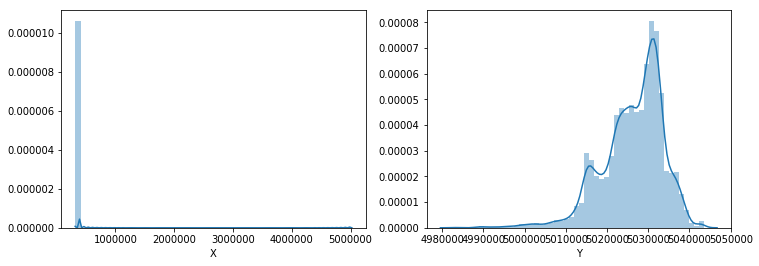

In [20]:
fig,axes=plt.subplots(1,2,figsize=(12,4)) # matplotlib grid of two plots
sns.distplot(df["X"],ax=axes[0]) # plot univariate distribution of X on first plot (axes[0])
sns.distplot(df["Y"],ax=axes[1]) # plot univariate distribution of X on first plot (axes[1])
#axes[0].set_xlim((0,1000000)) # uncomment to adjust the axis range in the X-distribution plot

The distribution of Y looks reasonable but the distribution of X is strange - check for outliers.

In [21]:
df[df["X"]>1e6] # this queries all rows of the dataframe that have an "X" value > 1 million

,X,Y,Location,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
Record,,,,,,,,,,,,
13481,5019473.742,5037585.1,VIEILLE-CASERNE PRIV btwn TOMPKINS AVE & TOMPK...,12/18/16,9:00,03 - Snow,03 - Loose snow,10 - No control,04 - At/near private drive,01 - Daylight,03 - P.D. only,99 - Other


There is only one entry that has X > 1000000.Let's assume an error in this entry and remove it. We'll verify the range of X after removal of this outlier and then replot the distributions.

In [22]:
df=df[df["X"]<1000000] # overwrite entire dataframe with all values satisfying criterion that X < 1e6 (aka outlier dropped)
df["X"].describe()

count     14022.000000
mean     367250.795307
std        9722.346009
min      318617.463200
25%      363413.158375
50%      367890.398750
75%      372146.695775
max      401606.170800
Name: X, dtype: float64

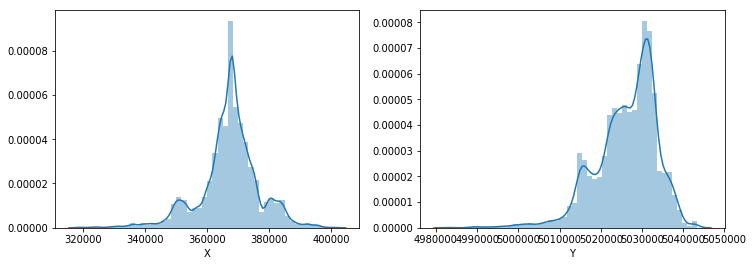

In [23]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.distplot(df["X"],ax=axes[0])
sns.distplot(df["Y"],ax=axes[1])

The univariate distributions look okay. We try to plot a geographical map of where collisions occur using the joint distribution of X and Y.

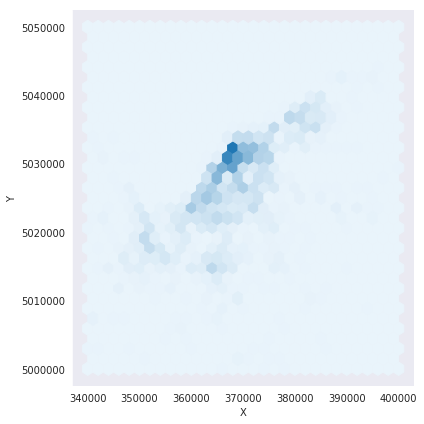

In [24]:
def hexbin(x, y, color, **kwargs):
    """ this is lifted directly from the Seaborn examples """
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df,height=6)
g.map(hexbin, "X", "Y",extent=[340000,400000,5000000,5050000])

We can add more granularity by explicitly plotting all of the $\{(x,y):x\in X,y\in Y\}$ pairs and label the points (intersections) with the top occurring collisions for context/location. (*Patrick's idea*)

In [25]:
df["Location"].value_counts()[:10] # Show top locations in the dataframe

ST. JOSEPH BLVD @ JEANNE D'ARC BLVD                            59
HUNT CLUB RD @ RIVERSIDE DR                                    43
PRINCE OF WALES DR @ WEST HUNT CLUB RD                         36
WEST HUNT CLUB RD @ WOODROFFE AVE                              35
HIGHWAY 417 btwn HWY417 IC122 RAMP61 & HWY417 IC121B RAMP16    35
MONTREAL RD @ VANIER PKWY                                      33
HAWTHORNE RD @ HUNT CLUB RD                                    33
HIGHWAY 417 btwn HWY417 IC126 RAMP61 & HWY417 IC124 RAMP76     31
CYRVILLE RD @ INNES RD                                         31
HIGHWAY 417 btwn HWY417 IC127 RAMP35 & HWY417 IC127 RAMP25     29
Name: Location, dtype: int64

In [28]:
toplocs=list(df["Location"].value_counts()[:5].index) # take top 5 collision locations for annotations
locpoints={} # make a dictionary of location:coordinate pairs
for loc in toplocs:
    xcoords=df[df["Location"]==loc]["X"].values # all entries in the X column with Location column matching loc
    ycoords=df[df["Location"]==loc]["Y"].values # all entries in the Y column with Location column matching loc
    coords=(xcoords[0],ycoords[0]) # the (x,y) coords for loc using its first entry in the dataframe
    locpoints[loc]=coords
print(locpoints)

{"ST. JOSEPH BLVD @ JEANNE D'ARC BLVD": (379861.0088, 5036471.847), 'HUNT CLUB RD @ RIVERSIDE DR': (368034.2185, 5021946.741), 'PRINCE OF WALES DR @ WEST HUNT CLUB RD': (367458.5139, 5021891.398), 'WEST HUNT CLUB RD @ WOODROFFE AVE': (363670.4715, 5021245.83), 'HIGHWAY 417 btwn HWY417 IC122 RAMP61 & HWY417 IC121B RAMP16': (366072.7378, 5029343.903)}


We use basic `matplotlib` functionality to plot points at all (x,y) pairs and annotate the top locations.

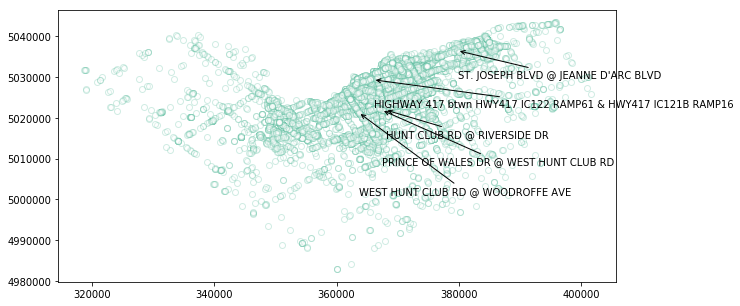

In [29]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(df["X"].values,df["Y"].values,color=sns.color_palette("Set2")[0],marker="o",
        linewidth=0,fillstyle="none",markerfacecolor="white",alpha=0.3) # plot all x,y pairs
dely=(ax.get_ylim()[1]-ax.get_ylim()[0])*.1 # set up a jitter value for offsetting annotations
suby=iter([dely*i for i in range(1,len(locpoints)+1)]) # iterator for adding noise/jitter to adjacent annotations
for k,v in locpoints.items():
    if "HUNT CLUB" in k: # these intersections are geographically very close so displace the labels manually
        ax.annotate(k,v,xytext=(v[0],v[1]-next(suby)),arrowprops=dict(arrowstyle="->"))
    else:
        ax.annotate(k,v,xytext=(v[0],v[1]-dely),arrowprops=dict(arrowstyle="->"))

### Pandas slicing examples

We include a few examples of dataframe slicing that may hopefully be instructive.

*"What are the possible road surfaces in the database?"*

In [83]:
df["Road_Surface"].unique()

[01 - Dry, 03 - Loose snow, 02 - Wet, 04 - Slush, 05 - Packed snow, 06 - Ice, 08 - Loose sand or gravel, 00 - Unknown, 99 - Other, 07 - Mud]
Categories (10, object): [01 - Dry, 03 - Loose snow, 02 - Wet, 04 - Slush, ..., 08 - Loose sand or gravel, 00 - Unknown, 99 - Other, 07 - Mud]

*"How many collisions occurred during the day?"*

In [89]:
len(df[df["Light"]=="01 - Daylight"])

9571

*What are the possible road surface conditions in the data set?*

In [97]:
df["Road_Surface"].unique()

[01 - Dry, 03 - Loose snow, 02 - Wet, 04 - Slush, 05 - Packed snow, 06 - Ice, 08 - Loose sand or gravel, 00 - Unknown, 99 - Other, 07 - Mud]
Categories (10, object): [01 - Dry, 03 - Loose snow, 02 - Wet, 04 - Slush, ..., 08 - Loose sand or gravel, 00 - Unknown, 99 - Other, 07 - Mud]

*"How many collisons were listed as a 'wet' environment and a 'wet' road surface?"*

In [98]:
len(df[np.logical_and(df["Environment"]=="02 - Rain",df["Road_Surface"]=="02 - Wet")])

934

*"How many collisons were listed as a 'wet' environment and not a 'wet' road surface?"*

In [99]:
len(df[np.logical_and(df["Environment"]=="02 - Rain",df["Road_Surface"]!="02 - Wet")])

79

*How many classifications were there of each collision classification?*

In [100]:
df["Collision_Classification"].value_counts()

03 - P.D. only           11251
02 - Non-fatal injury     2748
01 - Fatal injury           23
Name: Collision_Classification, dtype: int64